# Import dataset

We read the csv(comma separated values) into a dataframe.

In [2]:
df <- read.csv("data/games.csv")

# Let's explore this dataset

1. Let's take a look at the structure of this dataframe.

In [3]:
head(df)

rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name
FALSE,13,outoftime,white,15+2,1500,1191,Slav Defense: Exchange Variation
TRUE,16,resign,black,5+10,1322,1261,Nimzowitsch Defense: Kennedy Variation
TRUE,61,mate,white,5+10,1496,1500,King's Pawn Game: Leonardis Variation
TRUE,61,mate,white,20+0,1439,1454,Queen's Pawn Game: Zukertort Variation
TRUE,95,mate,white,30+3,1523,1469,Philidor Defense
FALSE,5,draw,draw,10+0,1250,1002,Sicilian Defense: Mongoose Variation


2. What are the dimenions of this dataframe? 

In [4]:
dim(df)

[1] 20058     8

3. Let's try pulling out the "winner" columns from this dataframe.

In [5]:
head(df$winner)
head(df[,"winner"])
head(df$`winner`)

[1] white black white white white draw 
Levels: black draw white

[1] white black white white white draw 
Levels: black draw white

[1] white black white white white draw 
Levels: black draw white

4. Let's try pulling out rows from this dataframe.

In [6]:
df[1,] # Single Rows

rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name
FALSE,13,outoftime,white,15+2,1500,1191,Slav Defense: Exchange Variation


In [7]:
df[1:10,] # Multiple Rows

rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name
FALSE,13,outoftime,white,15+2,1500,1191,Slav Defense: Exchange Variation
TRUE,16,resign,black,5+10,1322,1261,Nimzowitsch Defense: Kennedy Variation
TRUE,61,mate,white,5+10,1496,1500,King's Pawn Game: Leonardis Variation
TRUE,61,mate,white,20+0,1439,1454,Queen's Pawn Game: Zukertort Variation
TRUE,95,mate,white,30+3,1523,1469,Philidor Defense
FALSE,5,draw,draw,10+0,1250,1002,Sicilian Defense: Mongoose Variation
TRUE,33,resign,white,10+0,1520,1423,Blackmar-Diemer Gambit: Pietrowsky Defense
FALSE,9,resign,black,15+30,1413,2108,Nimzowitsch Defense: Kennedy Variation | Linksspringer Variation
TRUE,66,resign,black,15+0,1439,1392,Italian Game: Schilling-Kostic Gambit
TRUE,119,mate,white,10+0,1381,1209,Scandinavian Defense: Mieses-Kotroc Variation


5. Let's subset the dataframe by both rows and columns

In [8]:
df[1:10, "winner"]

[1] white black white white white draw  white black black white
Levels: black draw white

Let's go back and take a deeper look at the "winner" column

In [9]:
class(df$winner)

[1] "factor"

Let's change the type of "winner" from a factor to a character

In [10]:
char.winner <- as.character(df$winner)
summary(char.winner)
summary(df$winner)

   Length     Class      Mode 
    20058 character character 

black  draw white 
 9107   950 10001

# Plotting
Let's start simple. Plot the "white_rating" column from this dataframe.
There is a "plot" function in R that will do the heavy lifting for us, so we can focus on exploring the data!

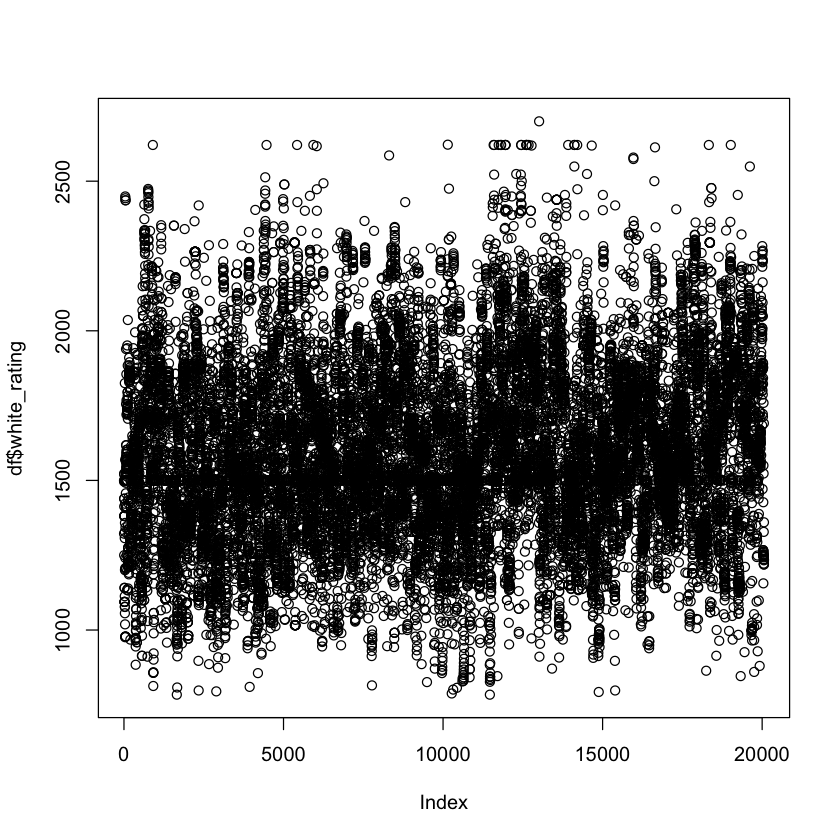

In [11]:
plot(df$white_rating)

In the plot above, we see that the y-axis is the white_rating column. The x-axis is the "index" or the row name in the dataframe.
Let's now try and plot a histogram of the white_rating.

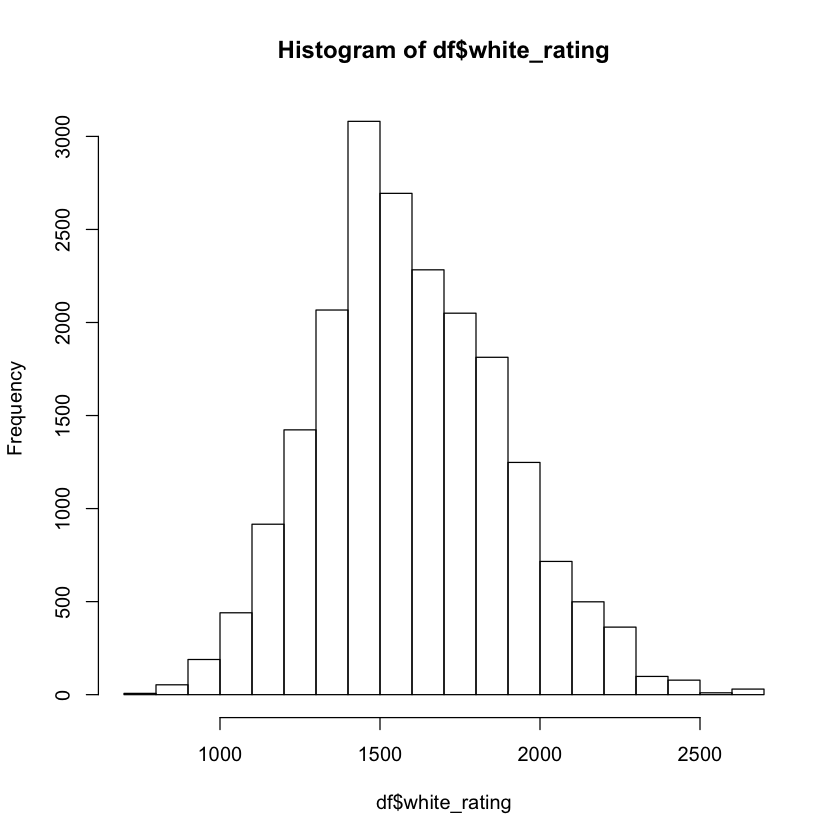

In [12]:
hist(df$white_rating)

Let's now plot white_rating vs black_rating.

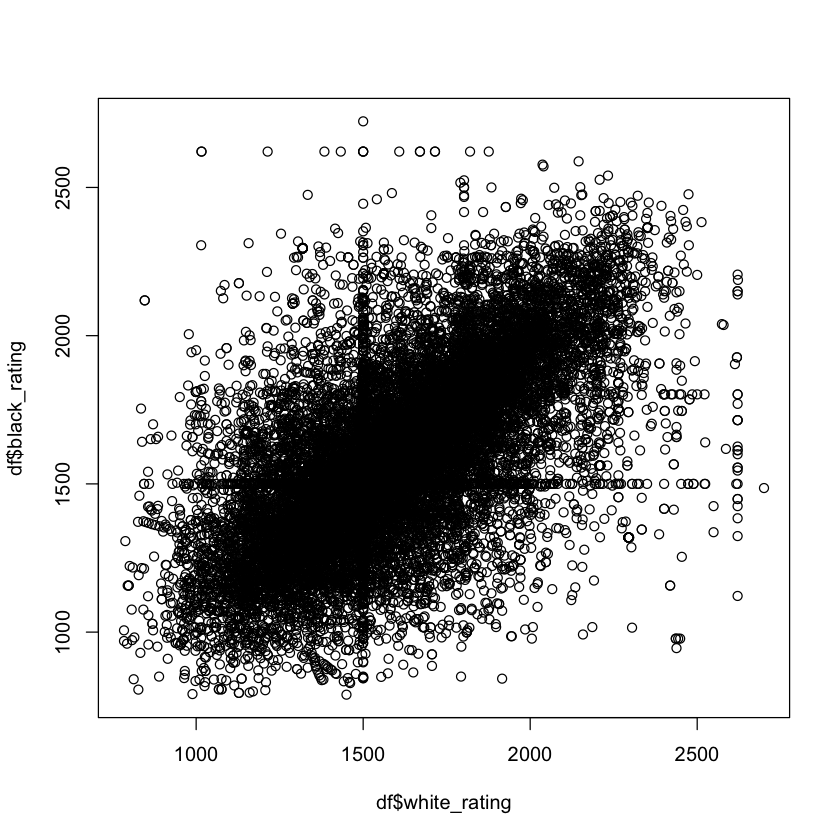

In [13]:
plot(df$white_rating, df$black_rating)

Let's try to make these filled circles using the 'pch' argument.

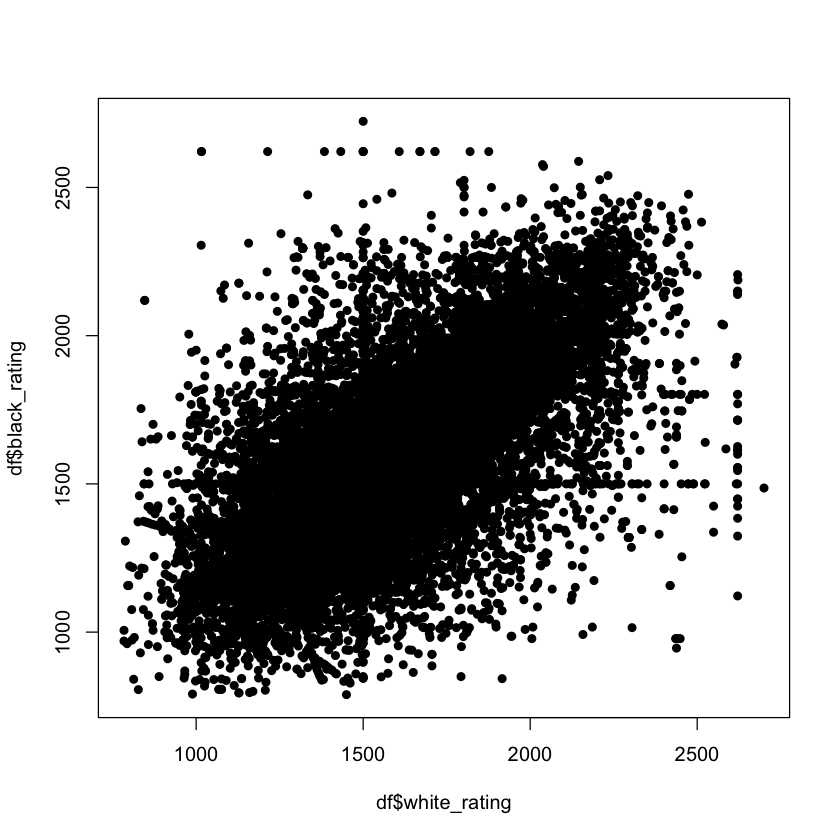

In [14]:
plot(df$white_rating, df$black_rating, pch=16)

Let's see all the 'pch' types.

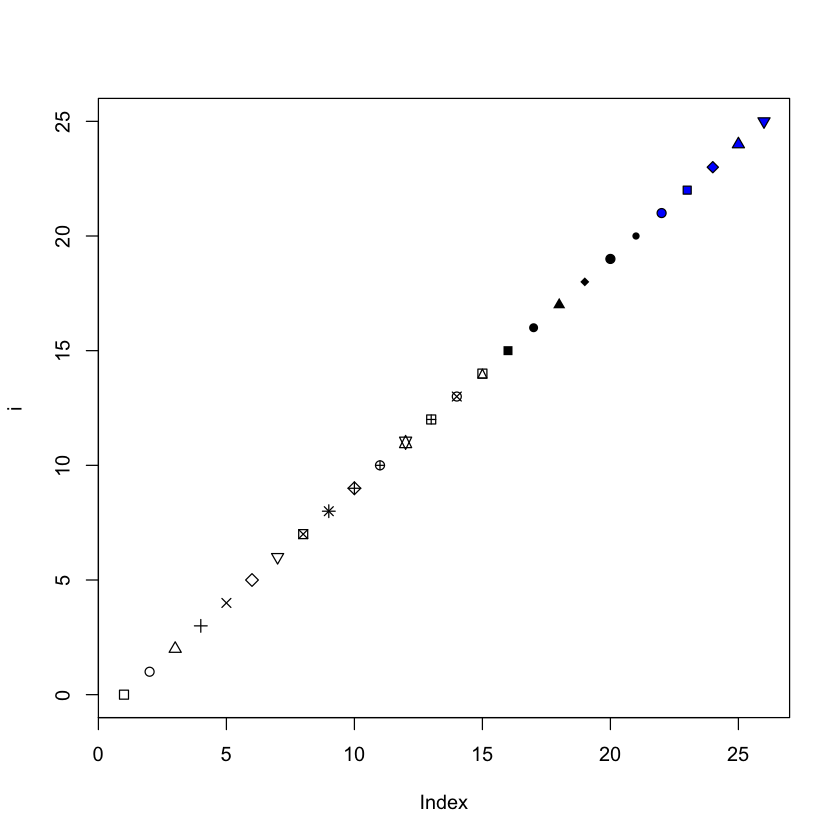

In [15]:
i <- c(0:25)
plot(i, pch = i, bg = "blue")

Let's try to make a little more sense of this plot by coloring the circles using another column in the dataframe.

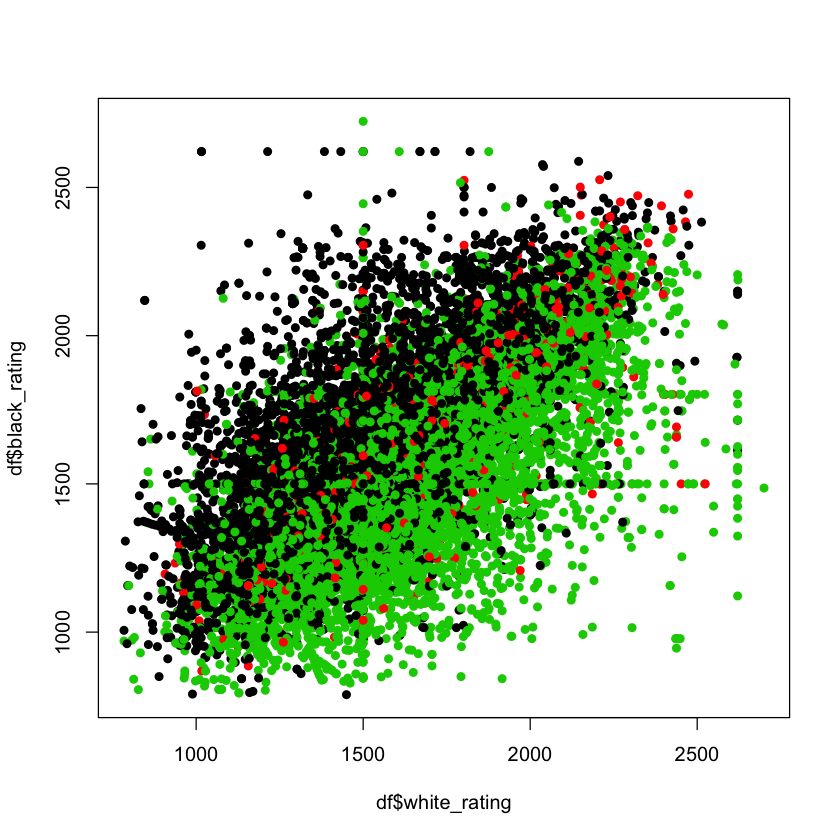

In [16]:
plot(df$white_rating, df$black_rating, col=df$winner, pch=16)

We need a legend to see what each of these values are. We will use the legend() function to display a simple legend.

In [17]:
help(legend)

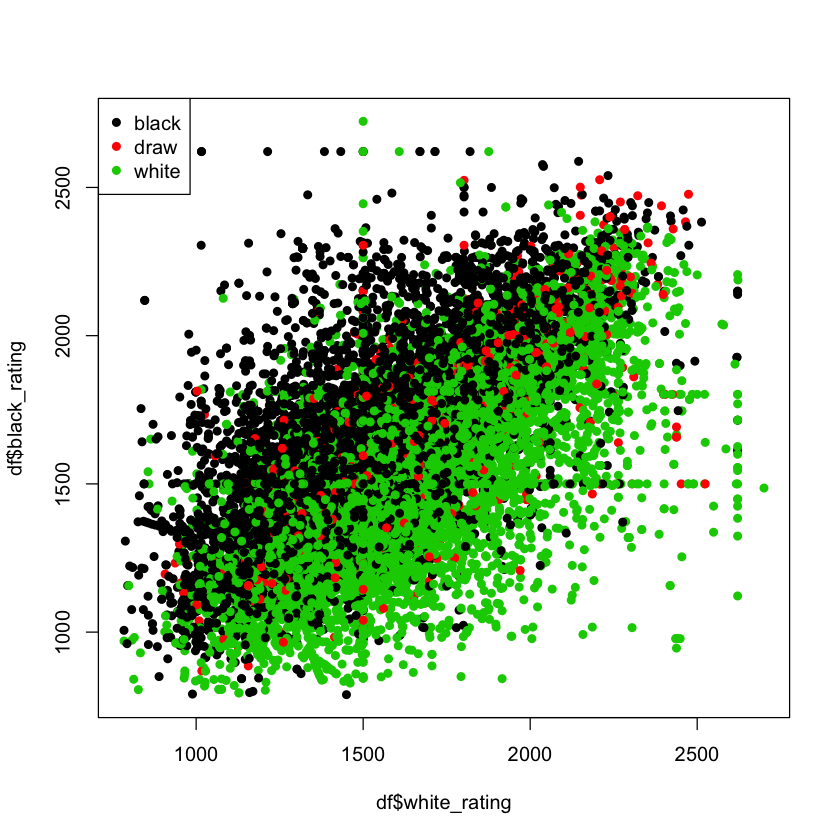

In [54]:
plot(df$white_rating, df$black_rating, col=df$winner, pch=16)
legend("topleft", legend = levels(df$winner), col = 1:3, pch = 16)

It's too much data on one plot! Let's now subset this based on the "winner" column

In [55]:
summary(df$winner)
df.draw <- df[df$winner == "draw",]

black  draw white 
 9107   950 10001

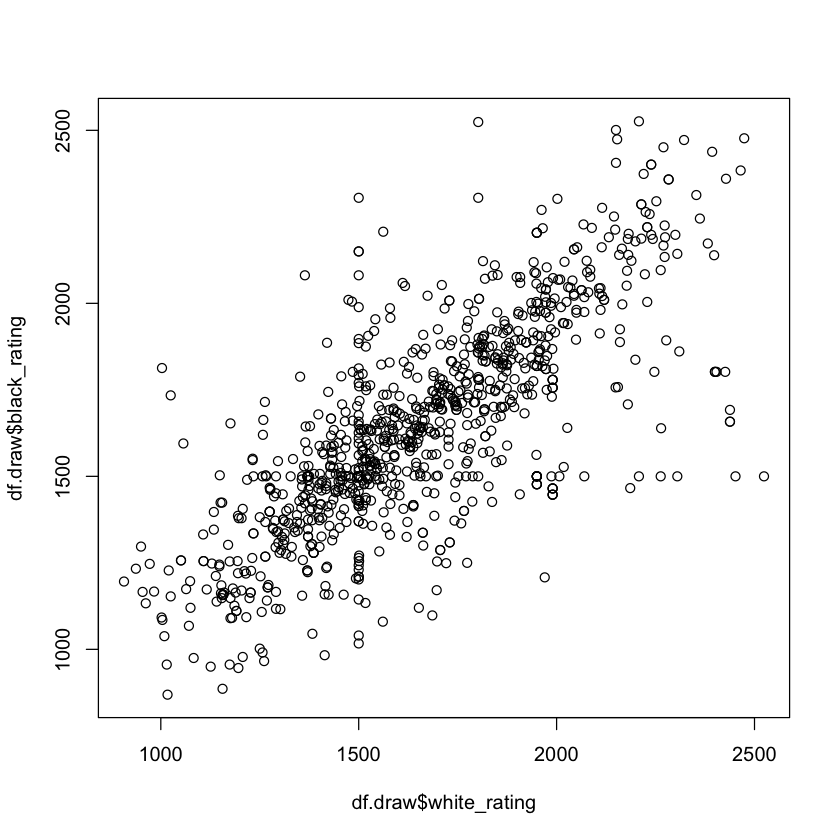

In [56]:
plot(df.draw$white_rating, df.draw$black_rating)

Some things to try out!
1. Plot a histogram of black_rating players.
2. Get the count of the different types of victories(columns name is "victory_status").
3. Plot the number of turns played(columns name is "turns") vs white_rating and show the legend.
4. Repeat 3 for black_rating.

Let's try to plot a bar chart to compare the number of wins by white and black players. We use the table function to get counts in each columns

In [83]:
table(df$winner)
d <- table(df$winner)


black  draw white 
 9107   950 10001 

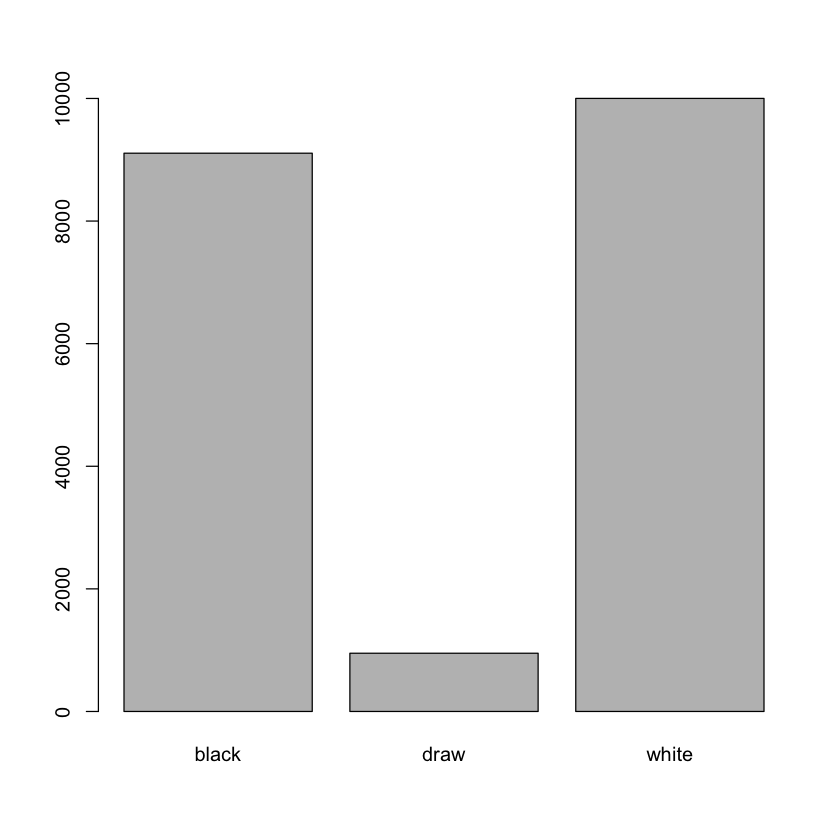

In [85]:
barplot(d)

Let's now try and make a more complicated table. Let's create one based on two columns - "winner" and "rated". 

In [86]:
table(df$winner, df$rated)
d <- table(df$winner, df$rated)

       
        FALSE TRUE
  black  1723 7384
  draw    231  719
  white  1949 8052

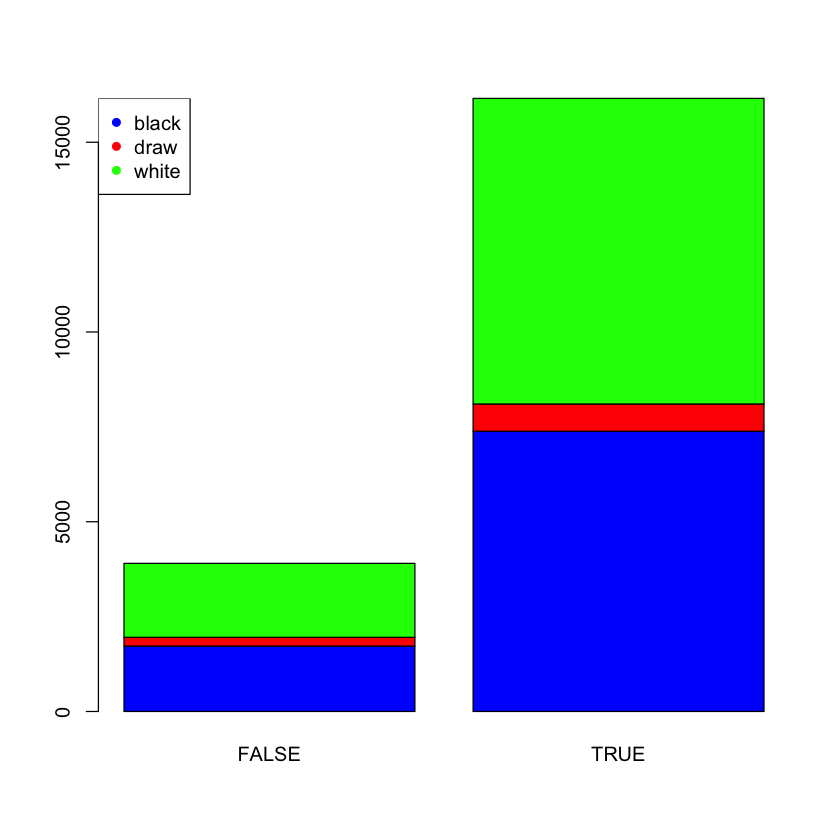

In [89]:
barplot(d, col=c("blue", "red", "green"))
legend("topleft", legend = rownames(d), col = c("blue", "red", "green"), pch = 16)

Let's stack the bars horizontally now.

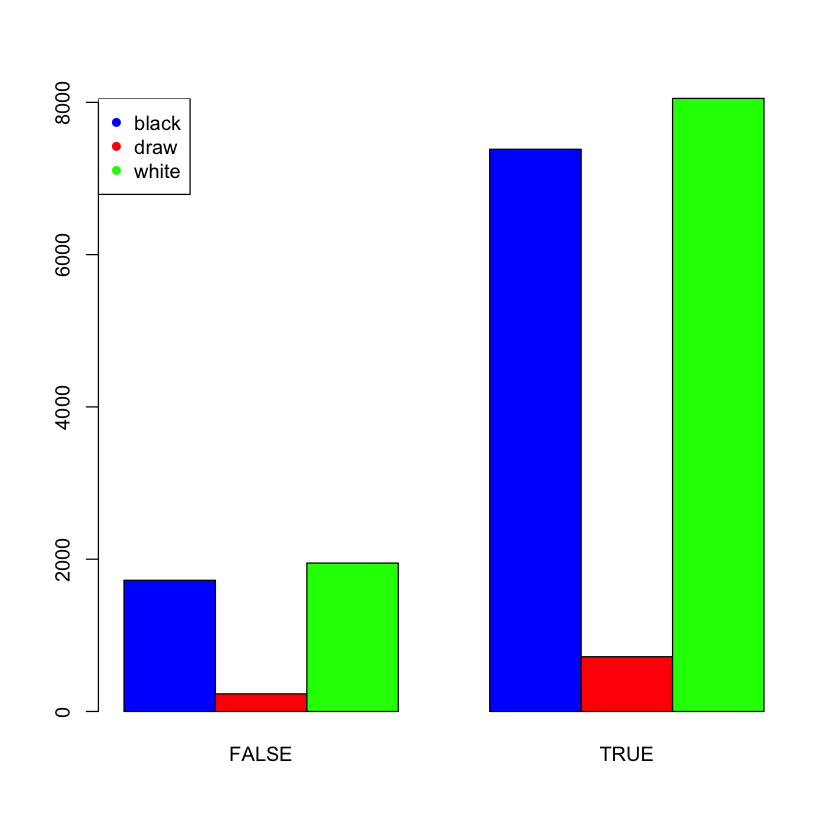

In [106]:
barplot(d, col = c("blue", "red", "green"), beside=TRUE)
legend("topleft", legend=rownames(d), col = c("blue", "red", "green"), pch=16)

We can use a box plot to plot a categorical variable vs a continuous variable. Let's try and see if the "RATED" games usually include players of a higher or a lower rating then "UNRATED" games.

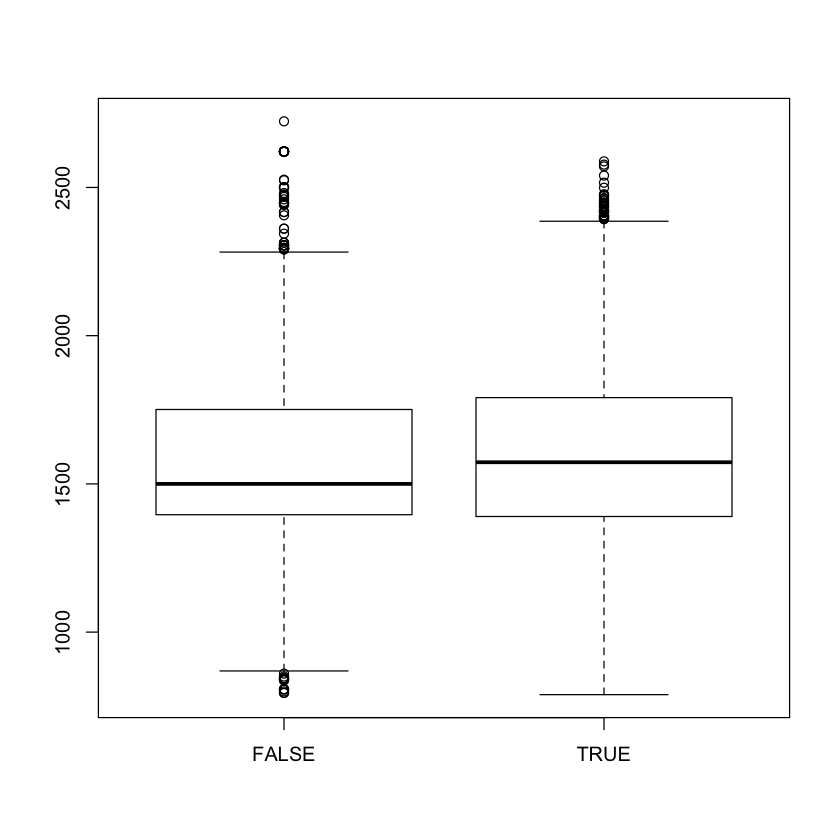

In [137]:
boxplot(df$black_rating ~ df$rated)

Let's try to subdivide this by victory_status.

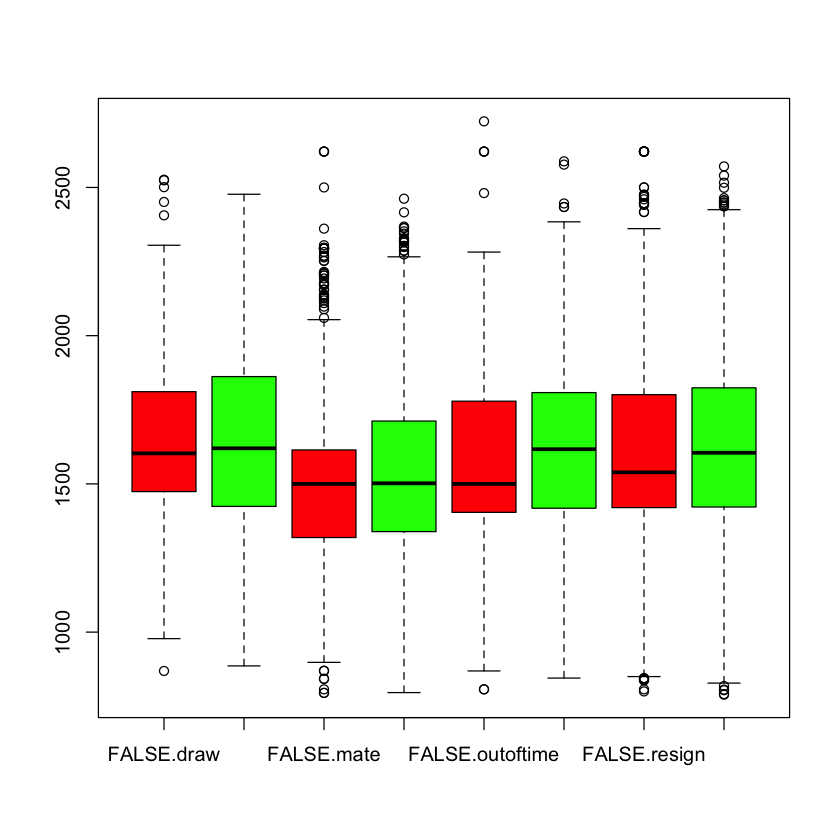

In [138]:
boxplot(df$black_rating ~ df$rated * df$victory_status, col=c("red", "green"))

Let's try to rotate the x axis labels vertical so that we can see all the labels.

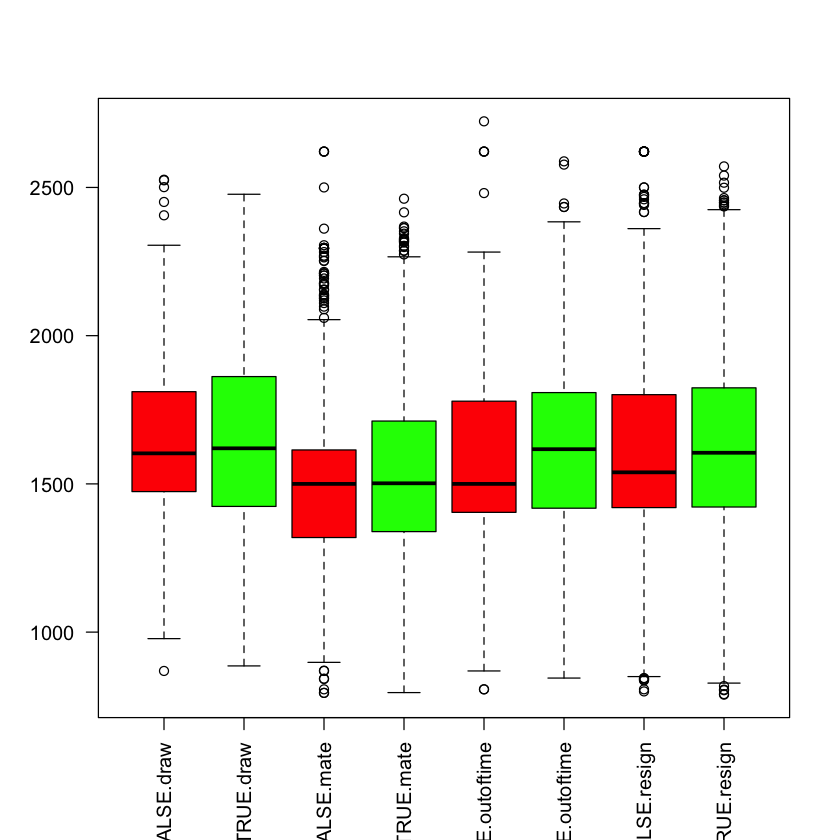

In [139]:
boxplot(df$black_rating ~ df$rated * df$victory_status, col=c("red", "green"), las=2)

Let's try and get the relationship between "turns" and rating. The hypothesis we have is that players with equal rating will end up playing a higher number of turns. How do we test this? 

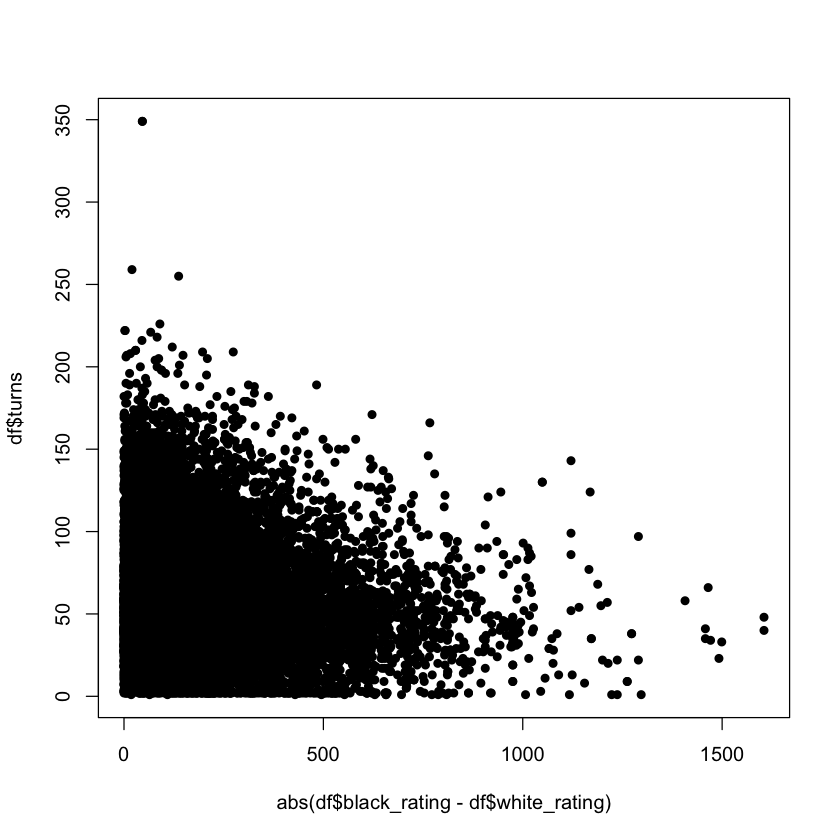

In [140]:
plot(abs(df$black_rating - df$white_rating), df$turns, pch = 16)

Questions

1. Make a bar chart showing the number of rated vs unrated games.
2. Make a barplot of the number of types of victories based on which player won.
3. Make a boxplot to see what type of victory had the highest median "white_rating"? 